# **SC1015 MINI-PROJECT**
---
## PROBLEM STATEMENT
### To predict whether a student will drop out based on a combination of the following variables:
* whether they are paying their tuition fees timely ("Tuition fees up to date")
* whether they are a scholarship holder ("Scholarship holder")
* their gender ("Gender")
* their age at enrollment ("Age at enrollment")
---

# Setup

### Importing Essential Libraries

In [3]:
# For data cleaning & processing
import numpy as np
import pandas as pd

# For data visualisation
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import plotly.express as px

sb.set()

### Importing Dataset

In [4]:
dropout = pd.read_csv("dropout.csv")
dropout

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Cleaning Dataset

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


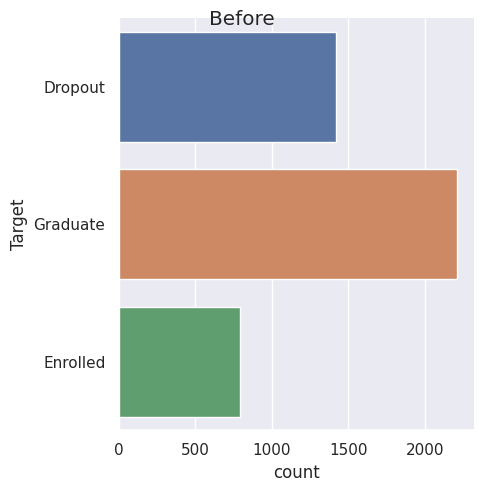

In [5]:
print(dropout["Target"].value_counts(dropna=False))

# Create the catplot
catplot = sb.catplot(y = "Target", data = dropout, kind = "count")

# Set the title
catplot.fig.suptitle("Before")

# Show the plot
plt.show()

"Target" is a **categorical variable** with 3 unique values: "Dropout", "Graduate", and "Enrolled". No NULL values are present in "Target".

In [6]:
# Making "clean" copy of DataFrame
dropout_clean = dropout.copy()

# Dropping all "Enrolled" data points & resetting indices
dropout_clean = dropout_clean[dropout_clean['Target'] != 'Enrolled'].reset_index()
dropout_clean_all = dropout_clean

# Keeping only "Tuition fees up to date", "Gender", "Scholarship holder", "Age at enrollment", "Target" columns
dropout_clean = dropout_clean[['Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Target']]

# Checking that cleaning was done correctly
print(dropout_clean['Target'].value_counts())

dropout_clean

Graduate    2209
Dropout     1421
Name: Target, dtype: int64


,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,1,1,0,20,Dropout
1,0,1,0,19,Graduate
2,0,1,0,19,Dropout
3,1,0,0,20,Graduate
4,1,0,0,45,Graduate
...,...,...,...,...,...
3625,1,1,0,19,Graduate
3626,0,0,0,18,Dropout
3627,1,0,1,30,Dropout
3628,1,0,1,20,Graduate


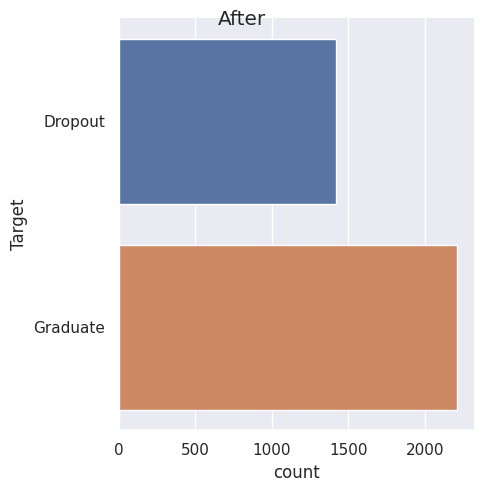

In [7]:
# Create the catplot
catplot = sb.catplot(y = "Target", data = dropout_clean, kind = "count")

# Set the title
catplot.fig.suptitle("After")

# Show the plot
plt.show()

Since our objective is to predict whether a student will drop out or graduate, we will only be focusing on "Dropout" and "Graduate" data points. "Enrolled" data points are dropped as they are irrelevant to our analysis.

In [8]:
dropout_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tuition fees up to date  3630 non-null   int64 
 1   Gender                   3630 non-null   int64 
 2   Scholarship holder       3630 non-null   int64 
 3   Age at enrollment        3630 non-null   int64 
 4   Target                   3630 non-null   object
dtypes: int64(4), object(1)
memory usage: 141.9+ KB


Our cleaned dataset now only consists of 3 predictors ("Tuition fees up to date", "Gender", and "Scholarship holder") and 1 response variable ("Target").

In [9]:
dropout_clean["Tuition fees up to date"].rename(index={0:'No',1:'Yes'}, inplace=True)
dropout_clean["Gender"].rename(index={0:'Male',1:'Female'}, inplace=True)
dropout_clean["Scholarship holder"].rename(index={0:'No',1:'Yes'}, inplace=True)
for var in ['Tuition fees up to date', 'Scholarship holder', 'Gender', 'Target']:
  print(dropout_clean[var].value_counts(dropna=False))
  print()

1    3144
0     486
Name: Tuition fees up to date, dtype: int64

0    2661
1     969
Name: Scholarship holder, dtype: int64

0    2381
1    1249
Name: Gender, dtype: int64

Graduate    2209
Dropout     1421
Name: Target, dtype: int64



<ipython-input-9-f02232e19aba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_clean["Tuition fees up to date"].rename(index={0:'No',1:'Yes'}, inplace=True)
<ipython-input-9-f02232e19aba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_clean["Gender"].rename(index={0:'Male',1:'Female'}, inplace=True)
<ipython-input-9-f02232e19aba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_clean["Scholarship holder"].ren

All of the variables do not have any NULL values in them. Our dataset is now clean and ready to be worked with.

# Exploratory Data Analysis


## Tuition fees up to date

Number of unique values: 2


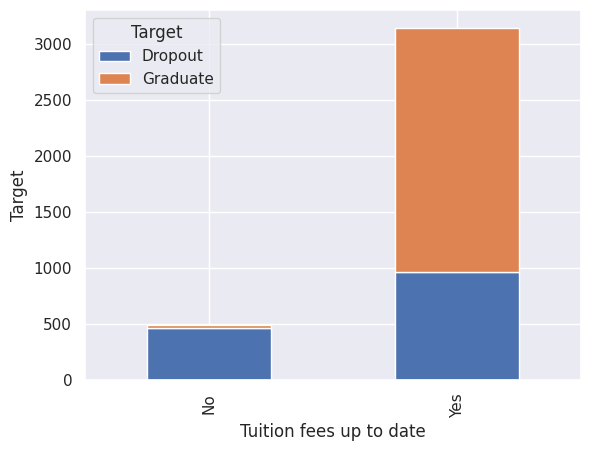

In [10]:
# "Tuition fees up to date" in the Dataset
print("Number of unique values:", len(dropout_clean["Tuition fees up to date"].unique()))


tfutd = dropout_clean.groupby(["Tuition fees up to date", 'Target']).size().reset_index().pivot(columns='Target', index="Tuition fees up to date", values=0)
tfutd = tfutd.rename(index={0:'No',1:'Yes'})
tfutd_total = tfutd.sum(axis=1)
tfutd_sorted = tfutd_total.sort_values(ascending=True)
tfutd.loc[tfutd.index].plot(kind='bar', stacked=True)

plt.xlabel("Tuition fees up to date")
plt.ylabel("Target")
plt.show()

Tuition fees up to date vs Target: 

Target                   Dropout  Graduate
Tuition fees up to date                   
0                            457        28
1                            963      2180 

Chi-Square		:710.5252772645691
P-value			:1.5379337101537844e-156
Degrees of Freedom	:1
Expected Frequencies	:[[ 189.82910695  295.17089305]
 [1230.17089305 1912.82910695]]



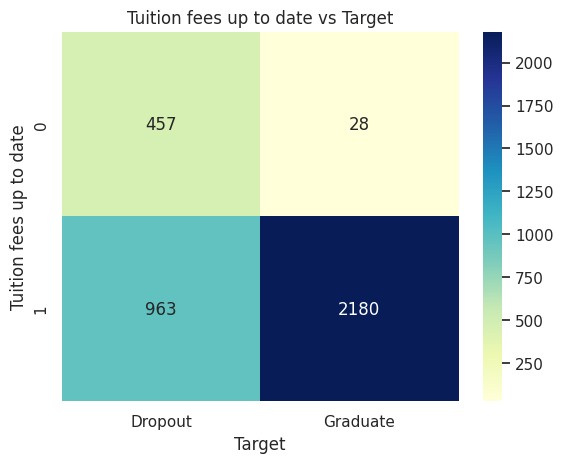

In [11]:
print("Tuition fees up to date vs Target: \n")
CrosstabResult = pd.crosstab(index=dropout_clean['Tuition fees up to date'], columns=dropout_clean['Target'])
print(CrosstabResult, "\n")
    
# Create a heatmap to visualize the correlation
fig, ax = plt.subplots()
heatmap = sb.heatmap(CrosstabResult, annot=True, cmap="YlGnBu", fmt='d', ax=ax)
heatmap.set_title('Tuition fees up to date vs Target')
    
# perform chi-square test
chi2, p, dof, expected = chi2_contingency(CrosstabResult)
    
# print the results
print(f"Chi-Square\t\t:{chi2}\nP-value\t\t\t:{p}\nDegrees of Freedom\t:{dof}\nExpected Frequencies\t:{expected}\n")

# show the plot
plt.show()

From above, we can see that the "Tuition fees up to date" variable is a **categorical variable** rather than a numerical variable. This is corroborated by the paper (Realinho et al., 2022) that this dataset is based off of.<br>
1 represents "Yes"; 0 represents "No"<br>
<br>
Observations:
1. "Tuition fees up to date" has an **almost extreme** class imbalance (minority class "No" accounts for 1.3% of the total).
2. **"No"** class has **high drop out rate**.
3. **More than 2/3** of students in the **"Yes"** class managed to graduate.

Conclusion:<br>
**Tuition fees up to date vs Target**:  The **chi-square** statistic is *710.5252772645691* and the **p-value** is *1.5379337101537844e-156*, indicating strong evidence against the null hypothesis of independence. This means that tuition fees up to date and the target variable are significantly associated.

## Scholarship holder

Number of unique values: 2
0    2661
1     969
Name: Scholarship holder, dtype: int64


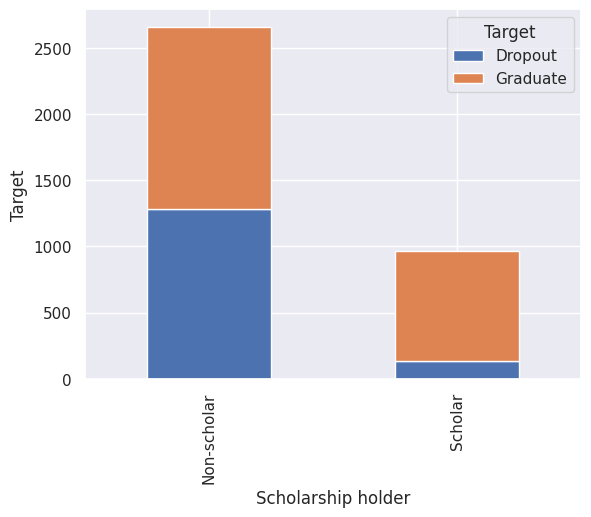

In [12]:
print("Number of unique values:", len(dropout_clean["Scholarship holder"].unique()))
print(dropout_clean["Scholarship holder"].value_counts())


scholar = dropout_clean.groupby(["Scholarship holder", 'Target']).size().reset_index().pivot(columns='Target', index="Scholarship holder", values=0)
scholar = scholar.rename(index={0:'Non-scholar',1:'Scholar'})
scholar_total = scholar.sum(axis=1)
scholar_sorted = scholar_total.sort_values(ascending=True)
scholar.loc[scholar.index].plot(kind='bar', stacked=True)
plt.xlabel('Scholarship holder')
plt.ylabel('Target')
plt.show()

Scholarship holder vs Target: 

Target              Dropout  Graduate
Scholarship holder                   
0                      1286      1373
1                       134       835 

Chi-Square		:354.1419513743124
P-value			:5.311117839217735e-79
Degrees of Freedom	:1
Expected Frequencies	:[[1040.73318633 1618.26681367]
 [ 379.26681367  589.73318633]]



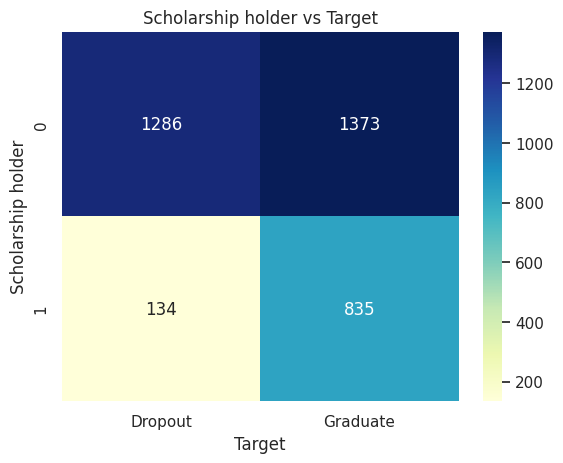

In [13]:
print("Scholarship holder vs Target: \n")
CrosstabResult = pd.crosstab(index=dropout_clean['Scholarship holder'], columns=dropout_clean['Target'])
print(CrosstabResult, "\n")
    
# Create a heatmap to visualize the correlation
fig, ax = plt.subplots()
heatmap = sb.heatmap(CrosstabResult, annot=True, cmap="YlGnBu", fmt='d', ax=ax)
heatmap.set_title('Scholarship holder vs Target')
    
# perform chi-square test
chi2, p, dof, expected = chi2_contingency(CrosstabResult)
    
# print the results
print(f"Chi-Square\t\t:{chi2}\nP-value\t\t\t:{p}\nDegrees of Freedom\t:{dof}\nExpected Frequencies\t:{expected}\n")

# show the plot
plt.show()

"Scholarship holder" is a **categorical variable**.<br>
1 represents "Scholar"; 0 represents "Not a scholar"

Observations:
1. "Scholarship holder" has a **mild** class imbalance (minority class "Non-scholar" accounts for 27% of the total).
2. Almost half of all non-scholars end up dropping out, as compared to a small minority of scholars.

Conclusion: <br>
**Scholarship holder vs Target**: 
The **chi-square** statistic is *354.1419513743124* and the **p-value** is *5.311117839217735e-79* , indicating strong evidence against the null hypothesis of independence. This means that being a scholarship holder and the target variable are significantly associated.

## Gender

Number of unique values: 2


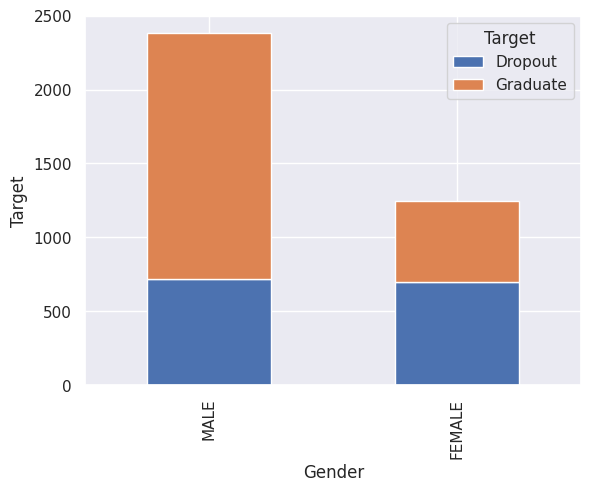

In [14]:
# "Gender" in the dataset
print("Number of unique values:", len(dropout_clean["Gender"].unique()))

gender = dropout_clean.groupby(["Gender", 'Target']).size().reset_index().pivot(columns='Target', index="Gender", values=0)
gender = gender.rename(index={0:'MALE',1:'FEMALE'})
gender_total = gender.sum(axis=1)
gender_sorted = gender_total.sort_values(ascending=True)
gender.loc[gender.index].plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Target')
plt.show()

Gender vs Target: 

Target  Dropout  Graduate
Gender                   
0           720      1661
1           700       547 

Chi-Square		:229.29618818581292
P-value			:8.488544026286193e-52
Degrees of Freedom	:1
Expected Frequencies	:[[ 931.92392503 1449.07607497]
 [ 488.07607497  758.92392503]]



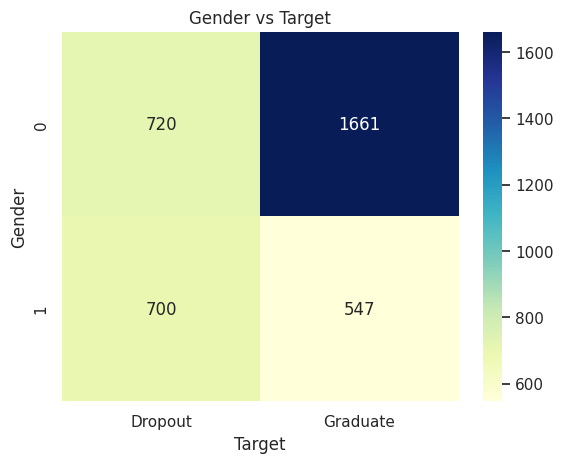

In [15]:
print("Gender vs Target: \n")
CrosstabResult = pd.crosstab(index=dropout_clean['Gender'], columns=dropout_clean['Target'])
print(CrosstabResult, "\n")
    
# Create a heatmap to visualize the correlation
fig, ax = plt.subplots()
heatmap = sb.heatmap(CrosstabResult, annot=True, cmap="YlGnBu", fmt='d', ax=ax)
heatmap.set_title('Gender vs Target')
    
# perform chi-square test
chi2, p, dof, expected = chi2_contingency(CrosstabResult)
    
# print the results
print(f"Chi-Square\t\t:{chi2}\nP-value\t\t\t:{p}\nDegrees of Freedom\t:{dof}\nExpected Frequencies\t:{expected}\n")

# show the plot
plt.show()

"Gender" is a categorical variable, where 0 represent Female , 1 represent Male.

Observations:
1. "Gender" has **mild** class imbalance (minority class "Female" accounts for 34% of the total).
2. **Female** has a **higher** dropout rate.
3. **Male** has a **lower** dropout rate.

Conclusion: <br>
Scholarship holder vs Target: The chi-square statistic is *229.29618818581292* and the p-value is *8.488544026286193e-52* , indicating strong evidence against the null hypothesis of independence. This means that being a scholarship holder and the target variable are significantly associated.

## Course


Start by exploring the predictor variable 'Course'

Course:

	1	BIOFUEL PRODUCTION TECHNOLOGIES
	2	ANIMATION & MULTIMEDIA DESIGN
	3	SOCIAL SERVICE
	4	AGRONOMY
	5	COMMUNICATION DESIGN
	6	VETERINARY NURSING
	7	INFORMATICS ENGINEERING
	8	EQUINICULTURE
	9	MANAGEMENT
	10	SOCIAL SERVICE
	11	TOURISM
	12	NURSING
	13	ORAL HYGIENE
	14	ADVERTISING & MARKETING MANAGEMENT
	15	JOURNALISM & COMMUNICATION
	16	BASIC EDUCATION
	17	MANAGEMENT (EVENING ATTENDANCE)

Number of different courses : 17
1       9
13     69
7     106
8     120
16    142
4     173
2     178
5     184
3     194
11    211
17    214
14    220
6     262
9     272
15    297
10    313
12    666
Name: Course, dtype: int64


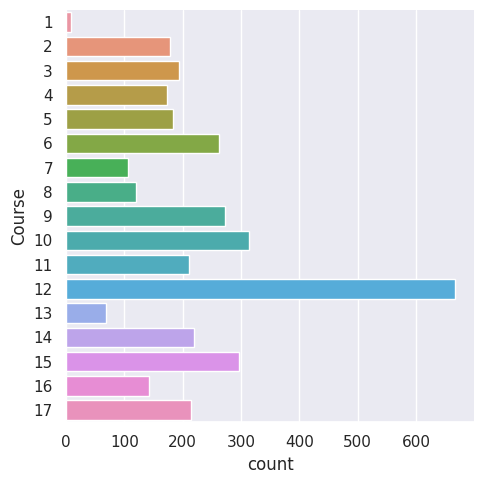

In [16]:
# Courses in the Dataset
print("Number of different courses :", len(dropout_clean_all["Course"].unique()))

#number of students in each courses
print(dropout_clean_all["Course"].value_counts().sort_values())
g=sb.catplot(y = "Course", data = dropout_clean_all, kind = "count")

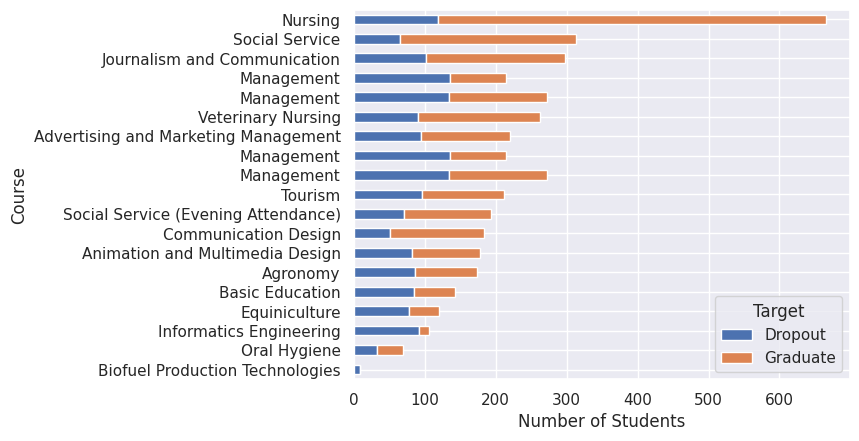

In [17]:
student_course = dropout_clean_all.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Rename the index of the DataFrame
student_course = student_course.rename(index={1:'Biofuel Production Technologies',
                                              2:'Animation and Multimedia Design',
                                              3:'Social Service (Evening Attendance)',4:'Agronomy',
                                              5:'Communication Design',6:'Veterinary Nursing',
                                              7:'Informatics Engineering',8:'Equiniculture',9:'Management',
                                              10:'Social Service',11:'Tourism',
                                              12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',
                                              15:'Journalism and Communication',16:'Basic Education',
                                              17:'Management'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

Course vs Gender: 

Gender    0    1
Course          
1         2    7
2        83   95
3       157   37
4        51  122
5       107   77
6       211   51
7         6  100
8        65   55
9       155  117
10      270   43
11      135   76
12      541  125
13       53   16
14      120  100
15      195  102
16      136    6
17       94  120 

Chi-Square		:620.2904702128035
P-value			:1.1325113663465392e-121
Degrees of Freedom	:16
Expected Frequencies	:[[  5.90330579   3.09669421]
 [116.75426997  61.24573003]
 [127.24903581  66.75096419]
 [113.47465565  59.52534435]
 [120.68980716  63.31019284]
 [171.85179063  90.14820937]
 [ 69.52782369  36.47217631]
 [ 78.7107438   41.2892562 ]
 [178.41101928  93.58898072]
 [205.30385675 107.69614325]
 [138.39972452  72.60027548]
 [436.8446281  229.1553719 ]
 [ 45.25867769  23.74132231]
 [144.3030303   75.6969697 ]
 [194.80909091 102.19090909]
 [ 93.14104683  48.85895317]
 [140.36749311  73.63250689]]



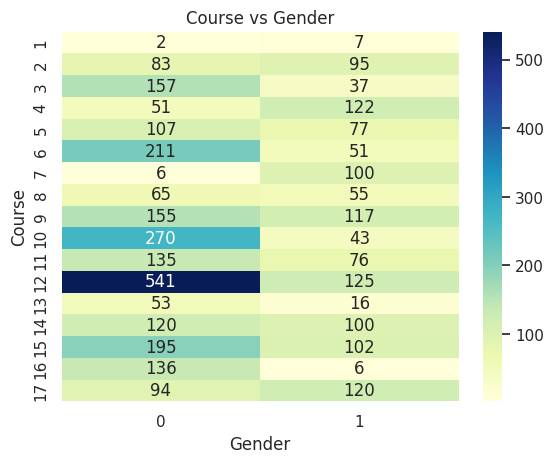

In [18]:
print("Course vs Gender: \n")
CrosstabResult = pd.crosstab(index=dropout_clean_all['Course'], columns=dropout_clean_all['Gender'])
print(CrosstabResult, "\n")
    
# Create a heatmap to visualize the correlation
fig, ax = plt.subplots()
heatmap = sb.heatmap(CrosstabResult, annot=True, cmap="YlGnBu", fmt='d', ax=ax)
heatmap.set_title('Course vs Gender')
    
# perform chi-square test
chi2, p, dof, expected = chi2_contingency(CrosstabResult)
    
# print the results
print(f"Chi-Square\t\t:{chi2}\nP-value\t\t\t:{p}\nDegrees of Freedom\t:{dof}\nExpected Frequencies\t:{expected}\n")

# show the plot
plt.show()

From above, we can see that the 'Course' variable is not a numerical variable, it is actually a categorical variable, which each discrete number represented a different courses.

Observation
1.   'Nursing' has the highest graduate rate 
2.   'Informatic egineering' and 'Biofuel Production Technology' has the highest dropout rate

The chi-square test and its associated p-value suggest that there is a significant association between gender and course

## Age at enrollment

In [19]:
dropout_clean['Age at enrollment'].describe()

count    3630.000000
mean       23.461157
std         7.827994
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

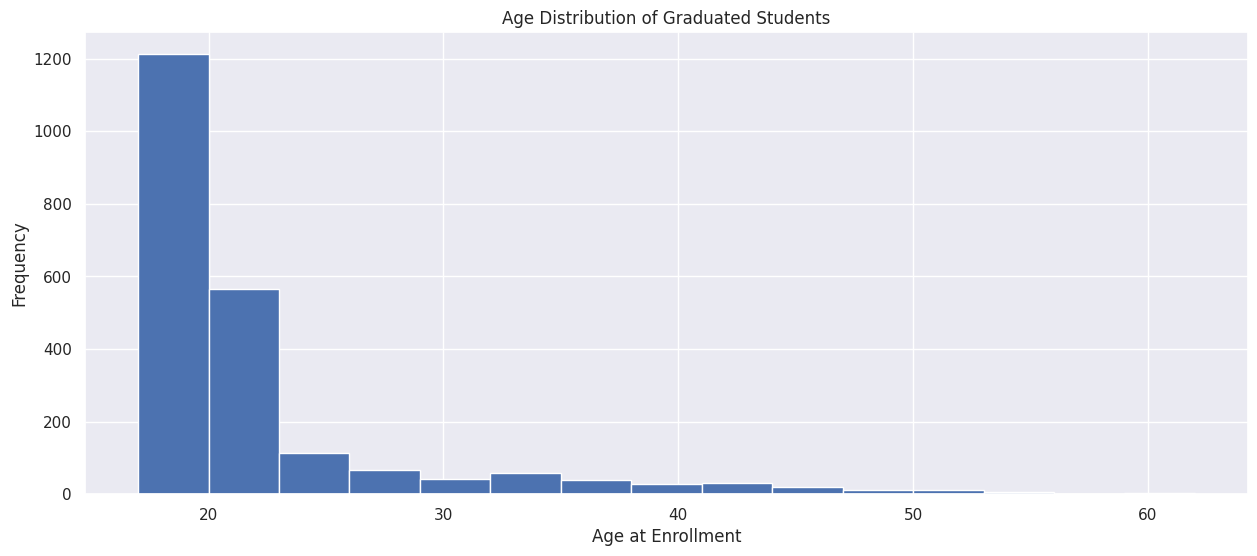

In [20]:
# Make a copy of the data frame
graduate_only = dropout_clean.copy()
# Filter out students who dropped out
graduate_only = graduate_only[graduate_only['Target'] != 'Dropout']

# Plot the histogram
plt.figure(figsize=(15, 6))
plt.hist(graduate_only['Age at enrollment'], bins=15)
plt.title('Age Distribution of Graduated Students')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()


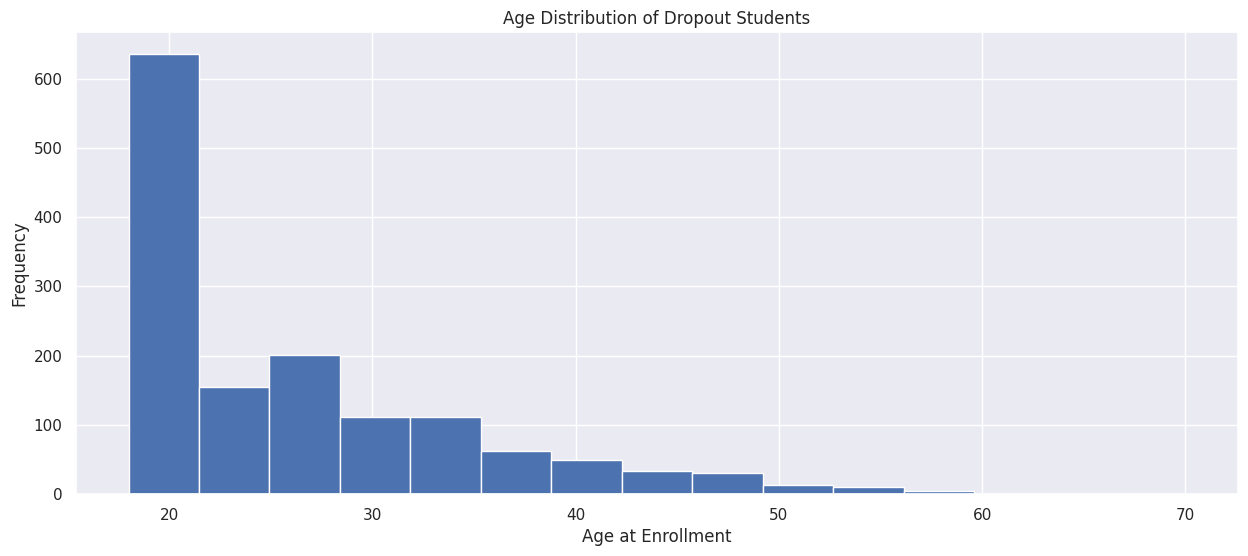

In [21]:

dropout_only = dropout_clean.copy()
'''
dropout_only = dropout_only[dropout_only['Target'] != 'Graduate']
dropout_only['Age at enrollment'].hist(bins=15, figsize=(15, 6))'''

# Filter out students who dropped out
dropout_only = dropout_only[dropout_only['Target'] != 'Graduate']

# Plot the histogram
plt.figure(figsize=(15, 6))
plt.hist(dropout_only['Age at enrollment'], bins=15)
plt.title('Age Distribution of Dropout Students')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

In [22]:
droupout_clean_copy=dropout_clean.copy()
# Define the categories and ranges
bins = [0, 25, 50]
labels = ['Young', 'Middle-aged']

# Use the cut() method to create a new column with categories
droupout_clean_copy['Age Group'] = pd.cut(droupout_clean_copy['Age at enrollment'], bins=bins, labels=labels)

droupout_clean_copy.head(10)

,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target,Age Group
0,1,1,0,20,Dropout,Young
1,0,1,0,19,Graduate,Young
2,0,1,0,19,Dropout,Young
3,1,0,0,20,Graduate,Young
4,1,0,0,45,Graduate,Middle-aged
5,1,1,0,50,Graduate,Middle-aged
6,1,0,1,18,Graduate,Young
7,0,1,0,22,Dropout,Young
8,1,0,1,21,Graduate,Young
9,0,0,0,18,Dropout,Young


Number of unique values: 3


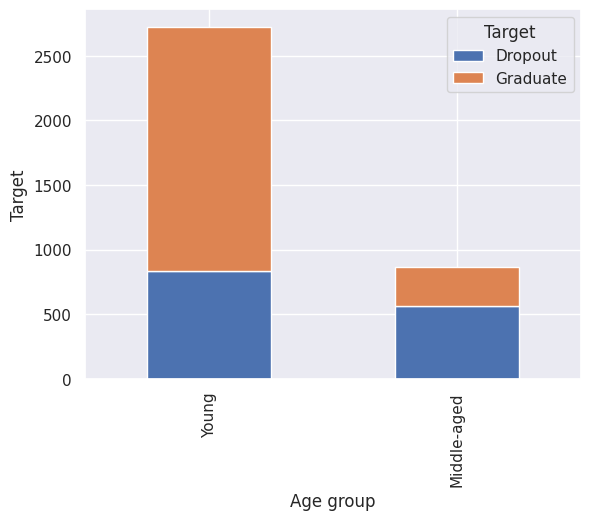

In [23]:
print("Number of unique values:", len(droupout_clean_copy['Age Group'].unique()))

tfutd = droupout_clean_copy.groupby(['Age Group', 'Target']).size().reset_index().pivot(columns='Target', index='Age Group', values=0)
tfutd_total = tfutd.sum(axis=1)
tfutd_sorted = tfutd_total.sort_values(ascending=True)
tfutd.loc[tfutd.index].plot(kind='bar', stacked=True)

plt.xlabel('Age group')
plt.ylabel('Target')
plt.show()

Generally, most of the uni students are 19-30 year olds. Higher graduation rate observed for younger students as compared to older. However this could be due to a much smaller number of older students.


## Nationality

Nacionality: Nationality of student

	1	PORTUGUESE
	2	GERMAN
	3	SPANISH
	4	ITALIAN
	5	DUTCH
	6	ENGLISH
	7	LITHUANIAN
	8	ANGOLAN
	9	CAPE VERDEAN
	10	GUINEAN
	11	MOZAMBICAN
	12	SANTOMEAN
	13	TURKISH
	14	BRAZILIAN
	15	ROMANIAN
	16	MOLDOVA (REPUBLIC OF)
	17	MEXICAN
	18	UKRAINIAN
	19	RUSSIAN
	20	CUBAN
	21	COLOMBIAN


In [24]:
nationality = dropout_clean_all['Nacionality']
print("Nationality before clean: ")
print(dropout_clean_all["Nacionality"].value_counts().sort_values())

Nationality before clean: 
19       1
6        1
8        1
21       1
5        1
15       1
11       1
7        1
2        2
16       2
17       2
18       3
4        3
10       5
3        8
12       9
9       12
14      32
1     3544
Name: Nacionality, dtype: int64


observation :
1. Number of Portugese student is much more than other country 

combine other countries together as 'other' 
using plotly to create a bar chart.

In [25]:
print("Nationality after clean: ")
nationality_clean = nationality.copy()
nationality_clean.loc[nationality_clean != 1] = 2
print(nationality_clean.value_counts())



nationality_counts = nationality_clean.value_counts().sort_values()


fig = px.bar(nationality_counts, x=nationality_counts.index, y=nationality_counts.values, 
             labels={'x': 'Nationality', 'y': 'Count'}, 
             title='Bar Chart of Nationality Counts (Cleaned)')
fig.show()

Nationality after clean: 
1    3544
2      86
Name: Nacionality, dtype: int64


# Using RandomForest to solve our problem statement

## Setup

In [26]:
# Importing required libraries for RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Importing required library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing required library for data visualisation
from sklearn.tree import plot_tree

In [27]:
# Putting predictors to X
X = dropout_clean.drop('Target', axis=1)
# Putting "Target" to y
y = dropout_clean['Target']

# Splitting data into TRAIN & TEST sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=dropout_clean['Tuition fees up to date'])

# Checking sample sizes
print("Sample Sizes \tTRAIN Set")
print("Predictor (x)\t:", X_train.shape)
print("Response (y)\t:", y_train.shape)
print()
print("Sample Sizes \tTEST Set")
print("Predictor (x)\t:", X_test.shape)
print("Response (y)\t:", y_test.shape)

Sample Sizes 	TRAIN Set
Predictor (x)	: (2904, 4)
Response (y)	: (2904,)

Sample Sizes 	TEST Set
Predictor (x)	: (726, 4)
Response (y)	: (726,)


From earlier EDA, we found that "Tuition fees up to date" has an **almost extreme** class imbalance. This class imbalance needs to be corrected.<br>
By including the "stratify" parameter, we can specify that our training & test datasets should contain examples of "Yes" & "No" for "Tuition fees up to date" in the same proportions as the original dataset.

## Hyperparameter tuning

In [29]:
# To measure time taken to execute this cell
%%time

# Defining which parameters to search for the best RandomForest model
params = {'n_estimators': np.arange(100, 1001, 100),
          'max_depth': np.arange(2, 11)}

# Creating grid
hp_grid = GridSearchCV(RandomForestClassifier(random_state=0), params, cv=5, scoring='accuracy')

# Fitting the data
hp_grid.fit(X_train, y_train)

CPU times: user 9min 38s, sys: 3.21 s, total: 9min 41s
Wall time: 9min 55s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

We are tuning the hyperparameters based on the F-score of the model built on them.<br>
We chose to use F-score as our grading metric for 2 reasons:
1. F-score takes into account both the Precision and the Recall of the model in equal weights, allowing us to optimise for both
2. Since F-score measures model performance by calculating the harmonic mean of precision and recall for the minority positive class, that makes it highly suitable for an imbalanced dataset such as the one we are using.

In [30]:
# To determine best set of hyperparameters
print(hp_grid.best_estimator_)

# To display the f1-score of the best model after Cross Validation (CV)
print("F-score on TRAIN dataset:", np.abs(hp_grid.best_score_))

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=0)
F-score on TRAIN dataset: 0.7537830138287138


From above, the best set of hyperparameters to use for our RandomTree model is with a **maximum depth of 6** and **200 estimators**.<br>
The F-score of this model on our training dataset is **0.75378**, indicating a moderately high precision.

## Building best model & analysing its results

In [31]:
# Creating RandomForest object based on the best set of hyperparameters
RF_train = RandomForestClassifier(max_depth=6, n_estimators=200, random_state=0)
RF_test = RandomForestClassifier(max_depth=6, n_estimators=200, random_state=0)

# Fitting RF to our TRAIN dataset
RF_train.fit(X_train, y_train)

# Testing RF model on TRAIN dataset
y_pred_train = RF_train.predict(X_train)

Confusion matrix on TRAIN dataset


<Axes: >

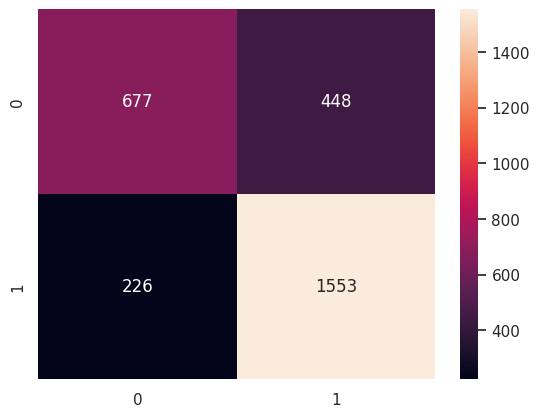

In [32]:
# Confusion matrix on TRAIN dataset
print("Confusion matrix on TRAIN dataset")
cm_train = confusion_matrix(y_train, y_pred_train)
sb.heatmap(cm_train, annot=True, fmt=".0f")

In [33]:
# Checking Precision & F-score of RF model on TRAIN dataset
precision_train = precision_score(y_train, y_pred_train, average='weighted')
fscore_train = f1_score(y_train, y_pred_train, average='weighted')
print("Precision of model:", precision_train)
print("F-score on TRAIN dataset:", fscore_train)

Precision of model: 0.7658890105481291
F-score on TRAIN dataset: 0.7620184335219301


The F-score of our model on the train dataset is **0.76202**, indicating a moderately high precision.

In [34]:
# Fitting RF to our TEST dataset
RF_test.fit(X_test, y_test)

# Testing RF model on TEST dataset
y_pred_test = RF_test.predict(X_test)

Confusion matrix on TEST dataset


<Axes: >

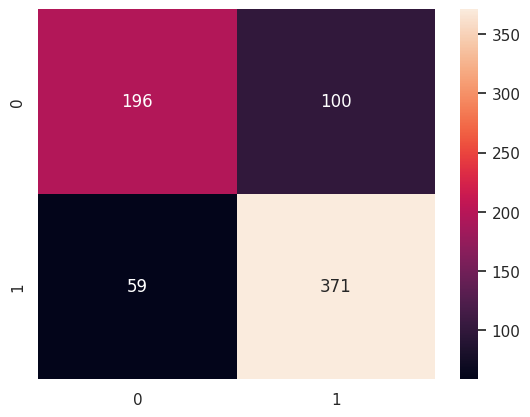

In [35]:
# Confusion matrix on TEST dataset
print("Confusion matrix on TEST dataset")
cm_test = confusion_matrix(y_test, y_pred_test)
sb.heatmap(cm_test, annot=True, fmt='.0f')

In [36]:
# Checking Precision & F-score of RF model
precision_test = precision_score(y_test, y_pred_test, average='weighted')
fscore_test = f1_score(y_test, y_pred_test, average='weighted')
print("Precision of model:", precision_test)
print("F-score on TEST dataset:", fscore_test)

Precision of model: 0.7799154390046451
F-score on TEST dataset: 0.7778265001010228


The F-score of our model on the test dataset is **0.77783**, indicating a moderately high precision.<br>
This means that our model has been well-fitted on the train dataset and is able to give us reliable predictions.

In [37]:
# To show the relative importance of each variable
importanceDF = pd.DataFrame({"Variable": X_train.columns, "Importance": RF_train.feature_importances_})
importanceDF.sort_values(by="Importance", ascending=False)

,Variable,Importance
0,Tuition fees up to date,0.496045
3,Age at enrollment,0.278767
2,Scholarship holder,0.160218
1,Gender,0.064969


Based on our model, 'Tuition fees up to date' is the most important variable in predicting whether a student will graduate or dropout.<br>
From earlier, although all the variables are strongly associated with Target, we can see from here that when the variables are put together, they contribute to the prediction of whether a student drops out or graduates with varying significance.

# Analysis of RandomForest Model

With a Random Forest model, we are only able to interpret the model as a whole in terms of which variables have the most predictive power and which have the least. We are unable to locally interpret the predictions with a Random Forest model; that is, we are unable to find the specific combinations of values that give a certain prediction.


# References

1. Realinho, V., Machado, J., Baptista, L., &amp; Martins, M. V. (2022). Predicting student dropout and academic success. Data, 7(11). https://doi.org/10.3390/data7110146

2. Hashmi, F. (2021) How to measure the correlation between two categorical variables in Python, Thinking Neuron. Available at: https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/ (Accessed: April 16, 2023). 